**Analyzing Data**

In [48]:
# import Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [49]:
# Importing CSV dataset
df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [51]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Finding Null Values

In [52]:
def assess_NA(data):
   
    # pandas series denoting features and the sum of their null values
    null_sum = data.isnull().sum()# instantiate columns for missing data
    total = null_sum.sort_values(ascending=False)
    percent = ( ((null_sum / len(data.index))*100).round(2) ).sort_values(ascending=False)
    
    # concatenate along the columns to create the complete dataframe
    df_NA = pd.concat([total, percent], axis=1, keys=['Number_of_NA','Percent_NA'])
    
    # drop rows that don't have any missing data; omit if you want to keep all rows
    df_NA = df_NA[ (df_NA.T != 0).any() ]
    global dh
    dh = df_NA[df_NA.Number_of_NA.values >= 260]
    print(dh ,'\n\n\n' ,df_NA)
#     print(df_NA)
#     return df_NA, dh

    
assess_NA(df)

             Number_of_NA  Percent_NA
PoolQC               1453       99.52
MiscFeature          1406       96.30
Alley                1369       93.77
Fence                1179       80.75
FireplaceQu           690       47.26 


               Number_of_NA  Percent_NA
PoolQC                1453       99.52
MiscFeature           1406       96.30
Alley                 1369       93.77
Fence                 1179       80.75
FireplaceQu            690       47.26
LotFrontage            259       17.74
GarageCond              81        5.55
GarageType              81        5.55
GarageYrBlt             81        5.55
GarageFinish            81        5.55
GarageQual              81        5.55
BsmtExposure            38        2.60
BsmtFinType2            38        2.60
BsmtFinType1            37        2.53
BsmtCond                37        2.53
BsmtQual                37        2.53
MasVnrArea               8        0.55
MasVnrType               8        0.55
Electrical               1 

**Visualization**

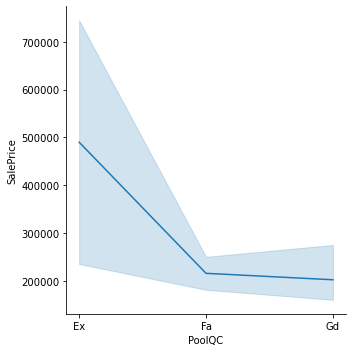

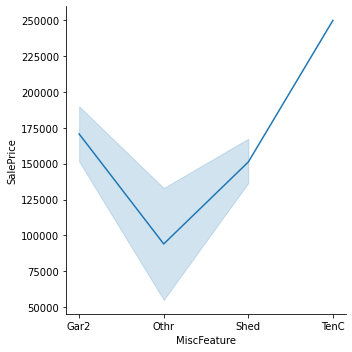

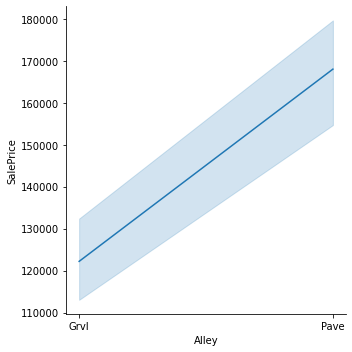

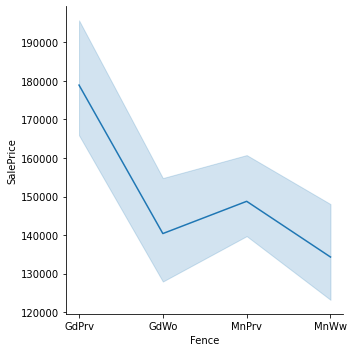

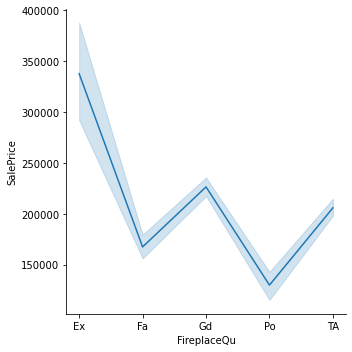

In [53]:
# Finding relation between the features of highest null values and the target

HN = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']

for f in HN:
    sns.relplot(x=f, y="SalePrice", kind = 'line', data=df)

Types of features in our data

In [54]:
# Int type data 
int_f= [f for f in df.columns if df[f].dtypes=='int64']
int_f, len(int_f)


(['Id',
  'MSSubClass',
  'LotArea',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'YearRemodAdd',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '1stFlrSF',
  '2ndFlrSF',
  'LowQualFinSF',
  'GrLivArea',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'TotRmsAbvGrd',
  'Fireplaces',
  'GarageCars',
  'GarageArea',
  'WoodDeckSF',
  'OpenPorchSF',
  'EnclosedPorch',
  '3SsnPorch',
  'ScreenPorch',
  'PoolArea',
  'MiscVal',
  'MoSold',
  'YrSold',
  'SalePrice'],
 35)

In [55]:
# object type
obj_f  = [f for f in df.columns if df[f].dtypes=='O']
obj_f


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [56]:
# floats
float_f= [f for f in df.columns if df[f].dtypes=='float']
float_f

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [57]:
# Num Data
nf = float_f + int_f
len(nf)

38

In [58]:
# Discrete Features
discrete_feature=[feature for feature in nf if len(df[feature].unique())<25 and feature not in ['Id']]

In [59]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [60]:
discrete_feature = discrete_feature[:14]
len(discrete_feature)

14

In [61]:
# Continous Features
continuous_feature=[feature for feature in nf if feature not in discrete_feature+['Id']]

In [62]:
continuous_feature

['LotFrontage',
 'MasVnrArea',
 'GarageYrBlt',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [63]:
t = []
for f in  continuous_feature:
    if "Yr" in f or 'Year' in f:
        t.append(f)
# [feature for feature in continuous_feature if 'Yr' in feature or 'Year' in feature]

In [64]:
for w in t:
    continuous_feature.remove(w)
print(continuous_feature)
len(continuous_feature)

['LotFrontage', 'MasVnrArea', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice']


19

In [65]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

**Outliers**

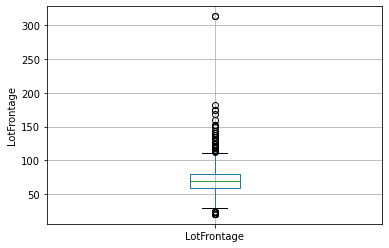

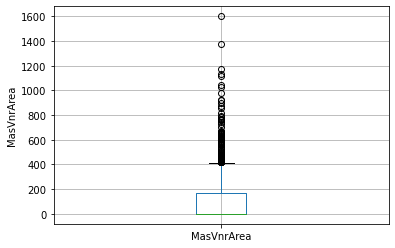

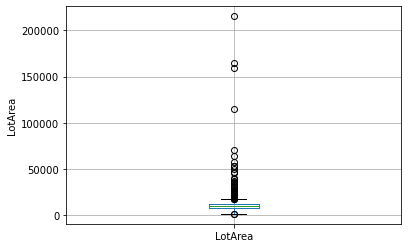

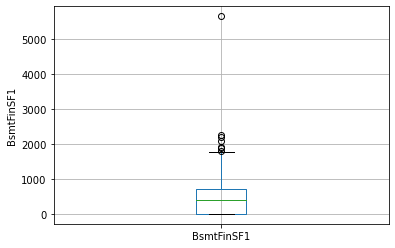

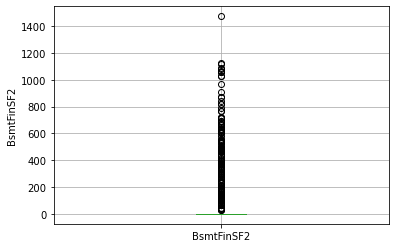

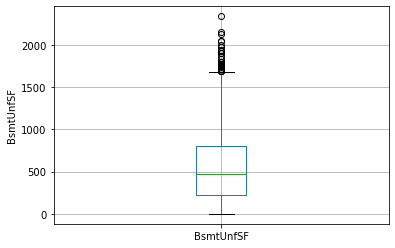

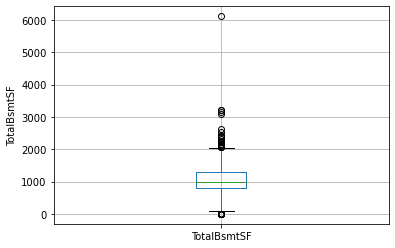

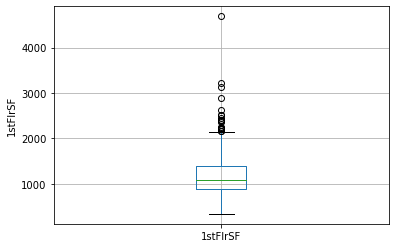

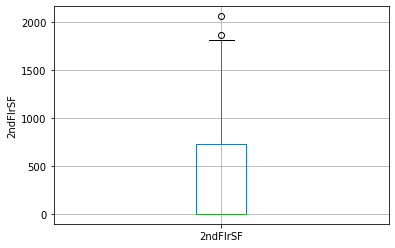

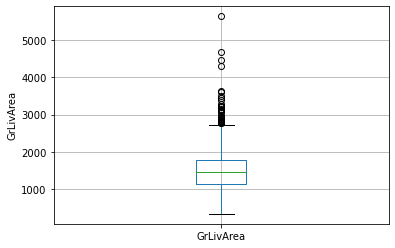

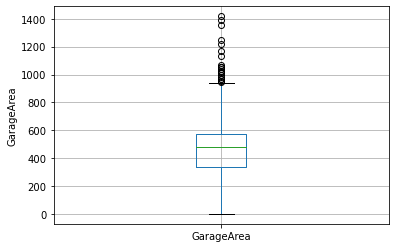

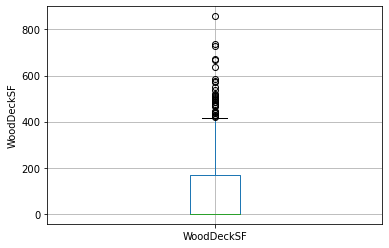

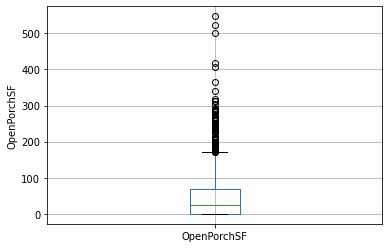

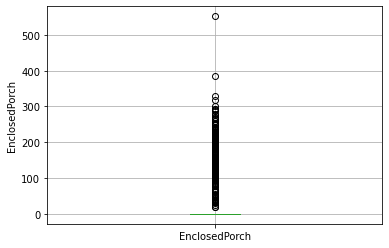

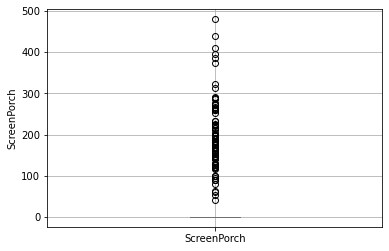

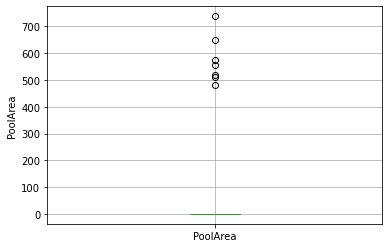

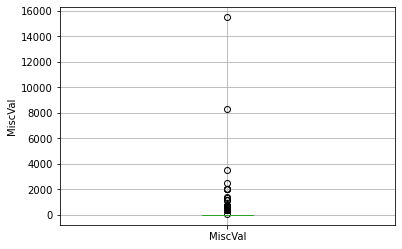

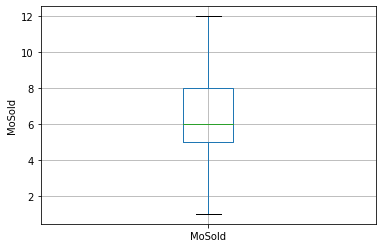

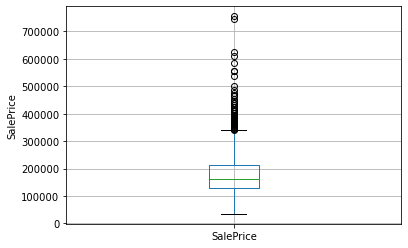

In [66]:

for feature in continuous_feature:
    df.boxplot(column=feature)
    plt.ylabel(feature)

    plt.show()


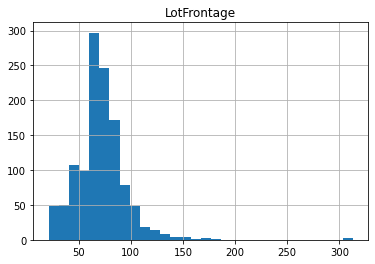

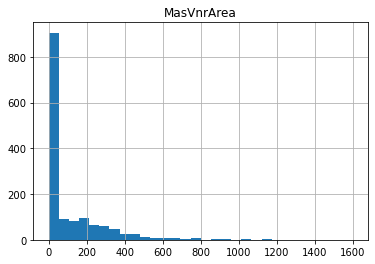

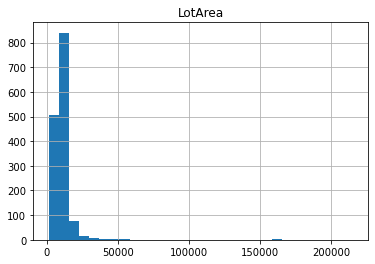

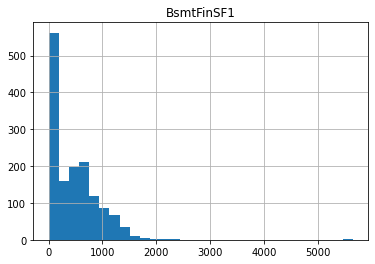

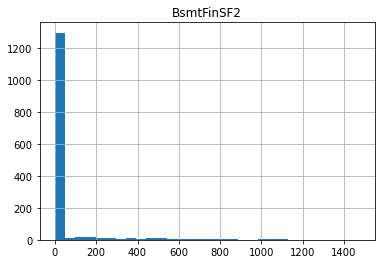

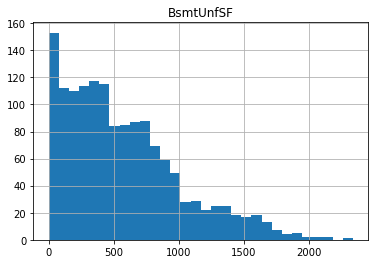

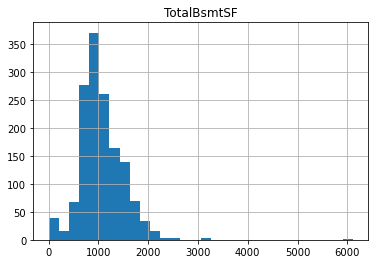

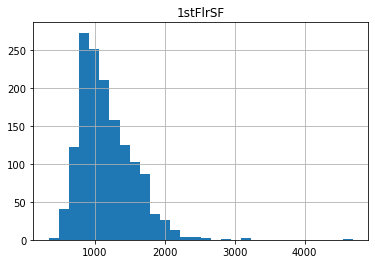

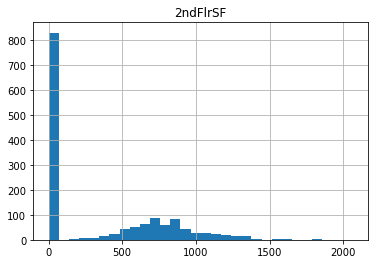

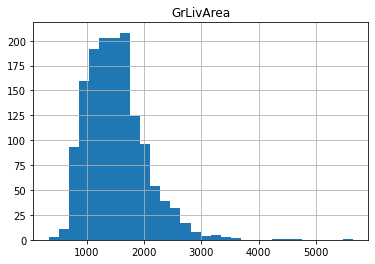

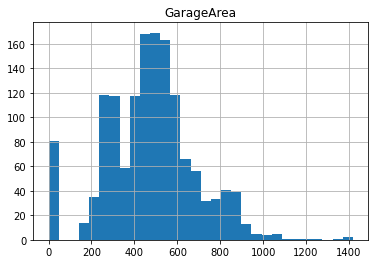

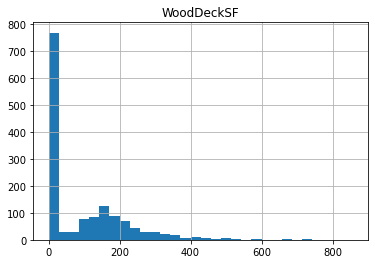

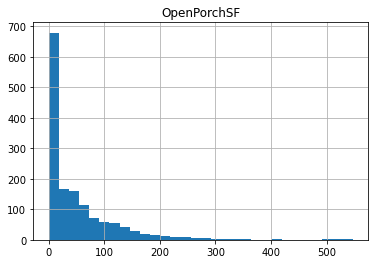

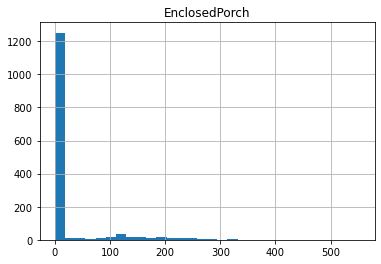

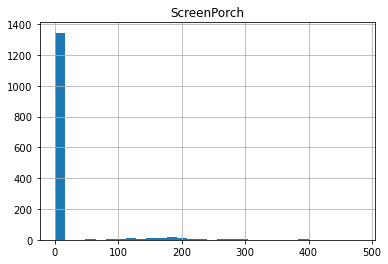

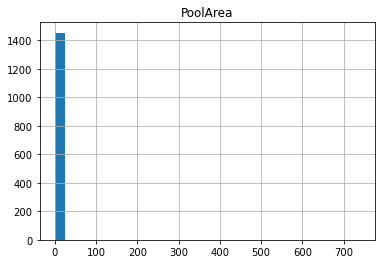

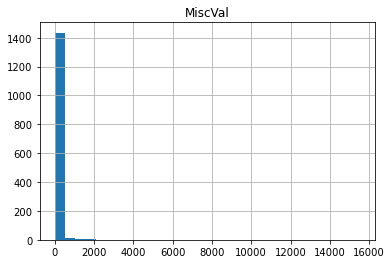

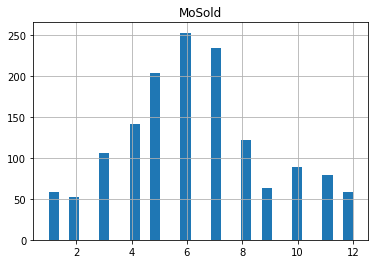

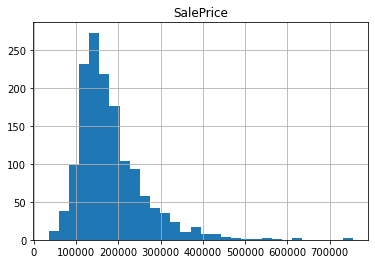

In [67]:
for feature in continuous_feature:
    df[feature].hist(bins = 30)
    plt.title(feature)
    plt.show()

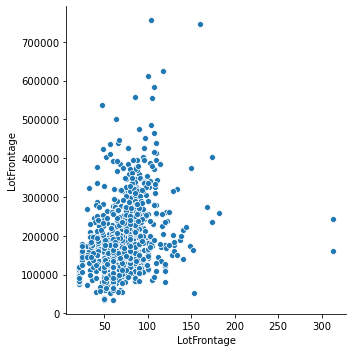

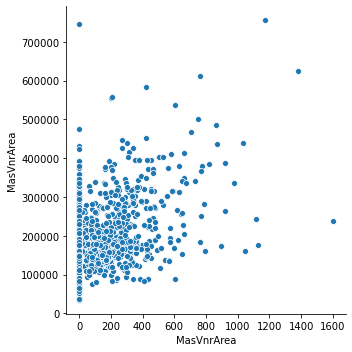

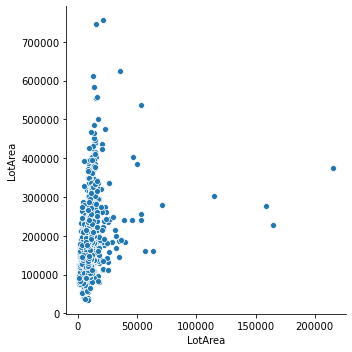

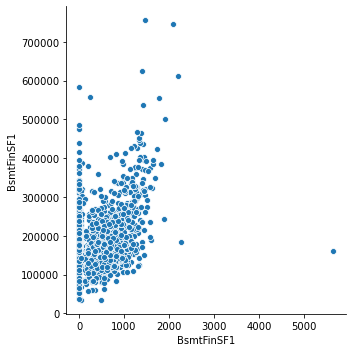

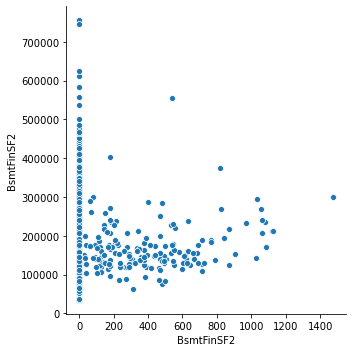

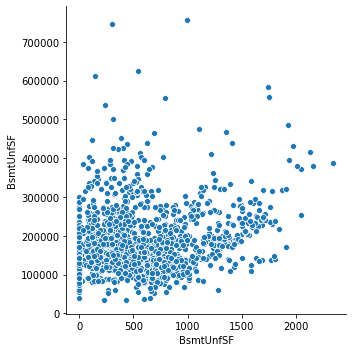

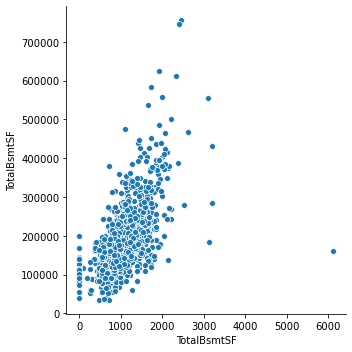

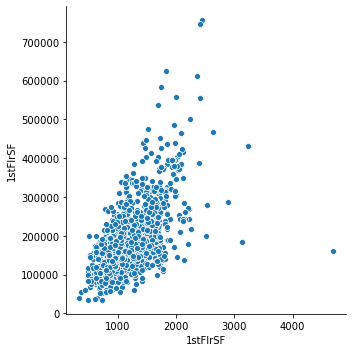

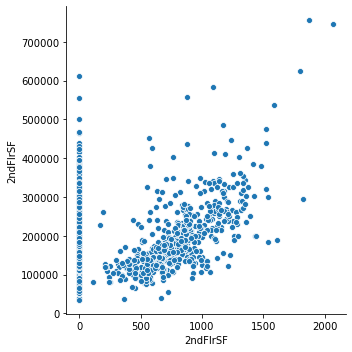

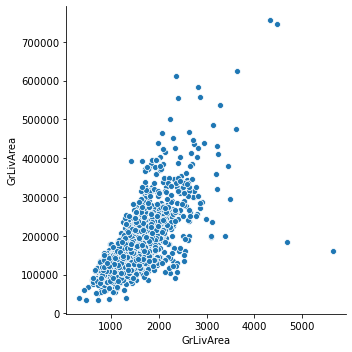

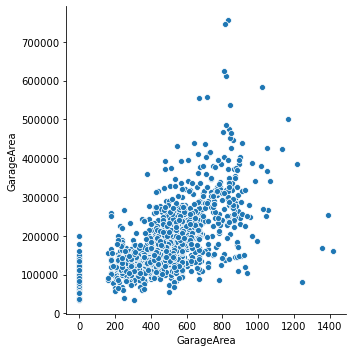

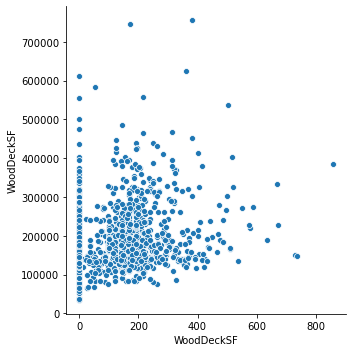

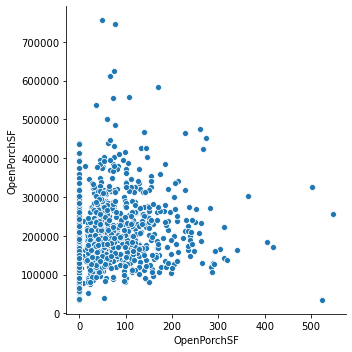

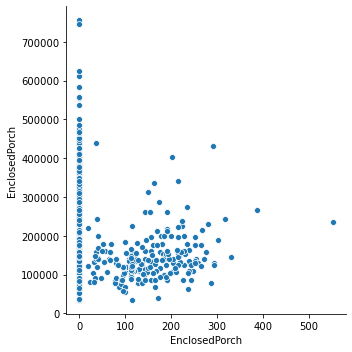

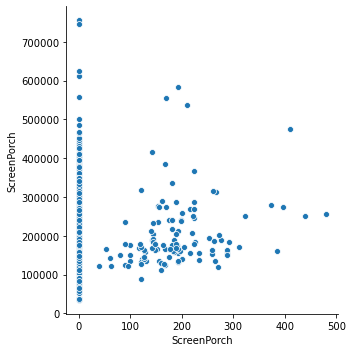

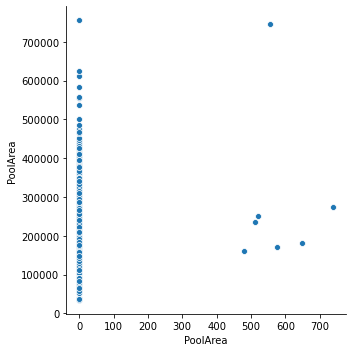

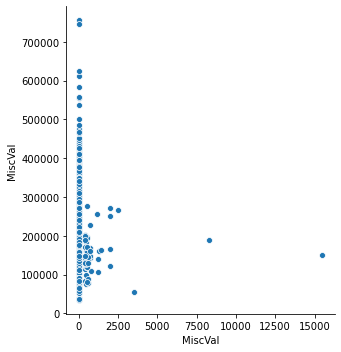

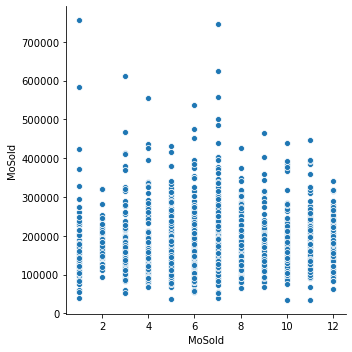

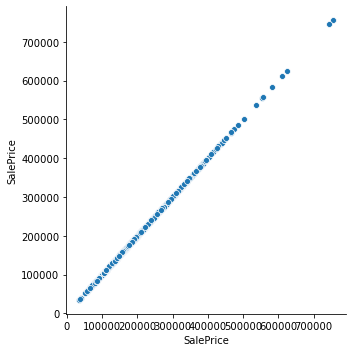

In [68]:
for feature in continuous_feature:
    sns.relplot(x=feature, y="SalePrice", data=df);
    plt.ylabel(feature)
    plt.show()

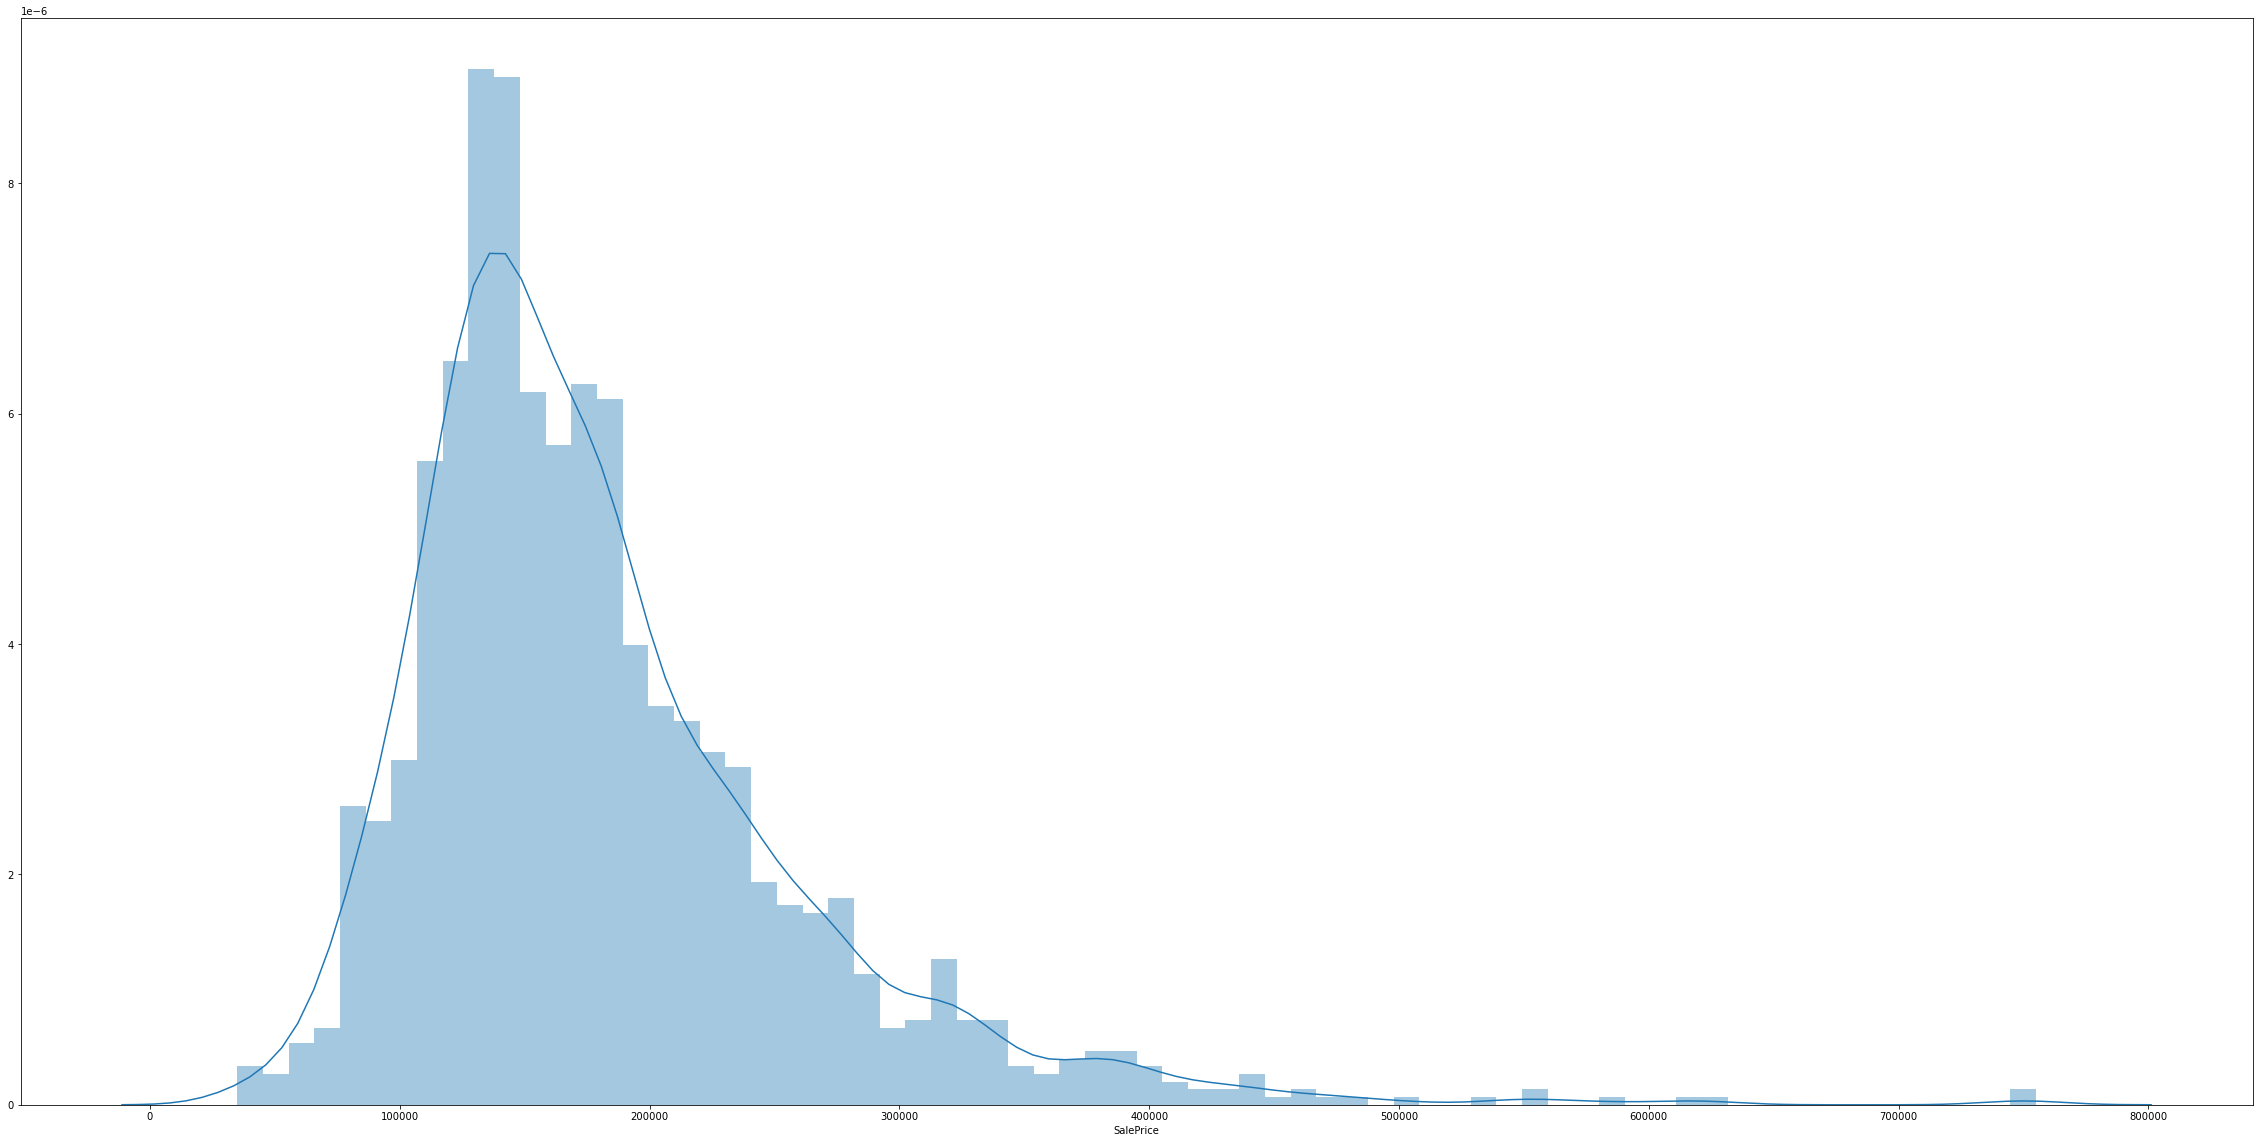

In [69]:
plt.figure(figsize=(40,20))
sns.distplot(df['SalePrice'], bins=70)


Categorical

In [70]:
cat = []
for c in df.columns:
    if df[c].dtype=='O':
        cat.append(c)
print(len(cat))

43


**Relation between the categorical features and the Target**

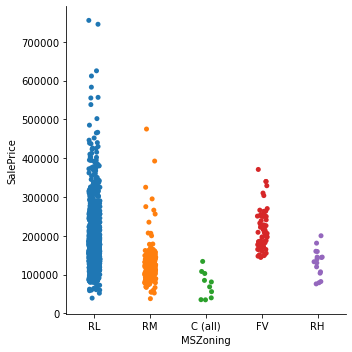

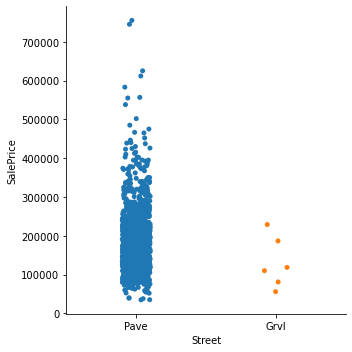

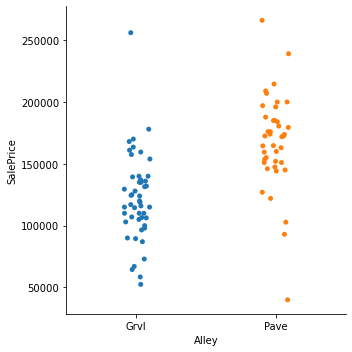

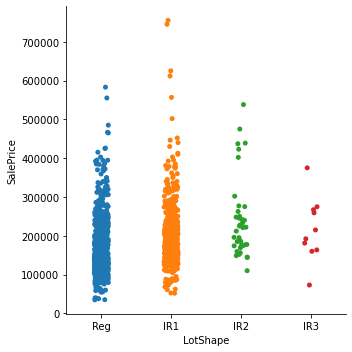

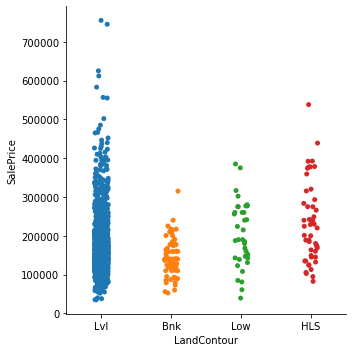

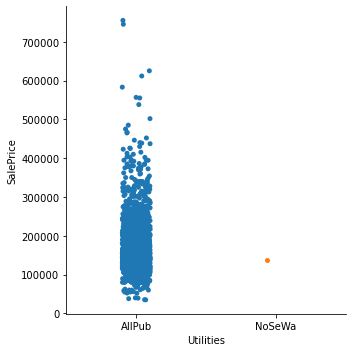

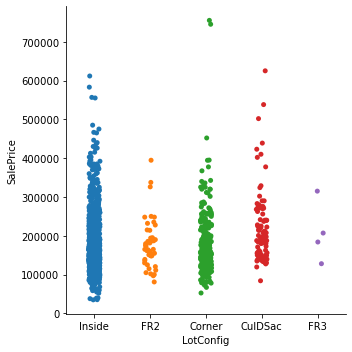

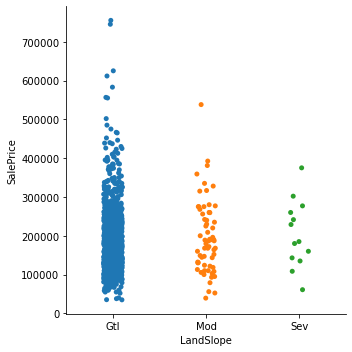

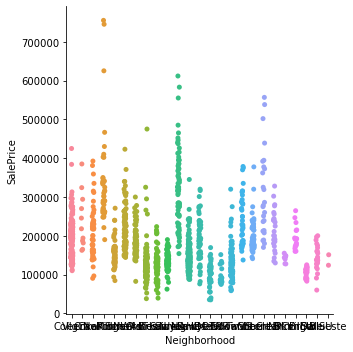

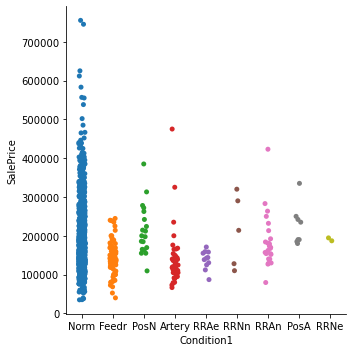

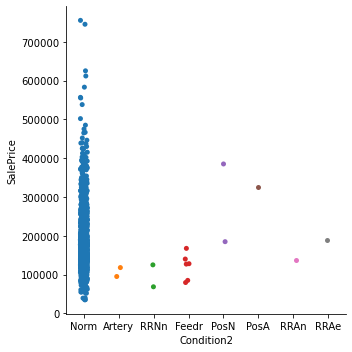

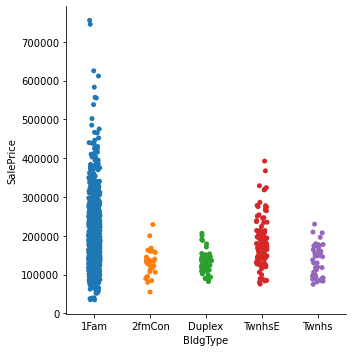

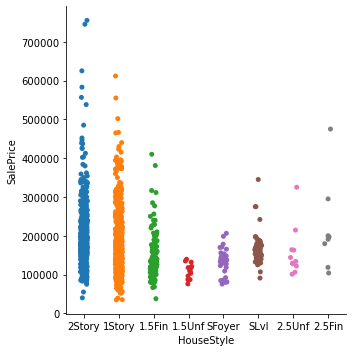

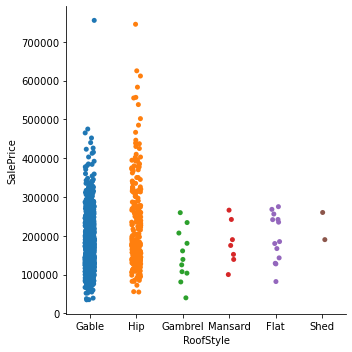

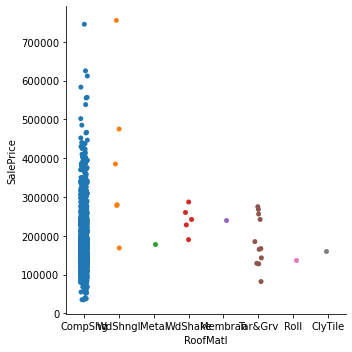

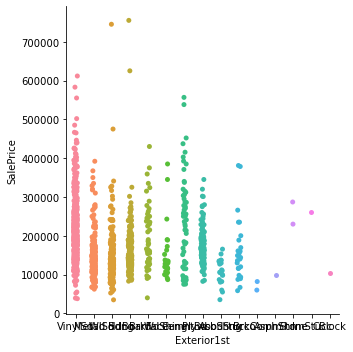

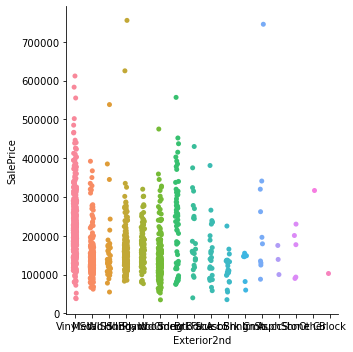

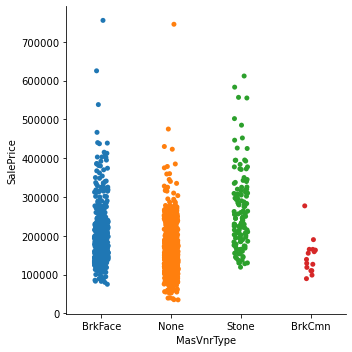

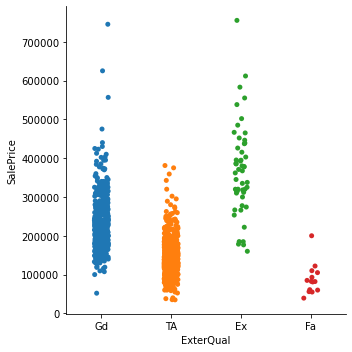

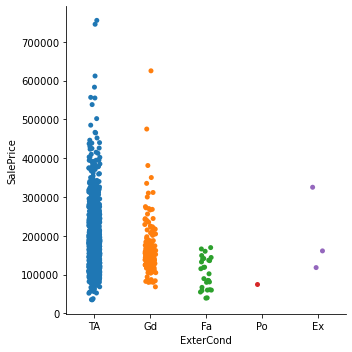

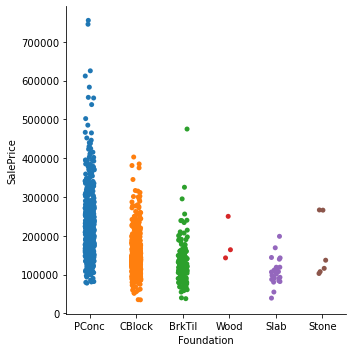

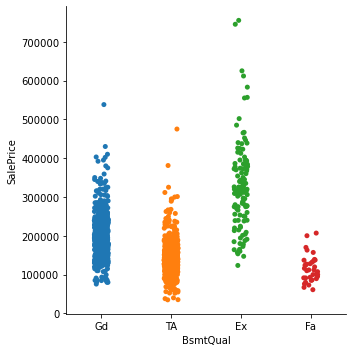

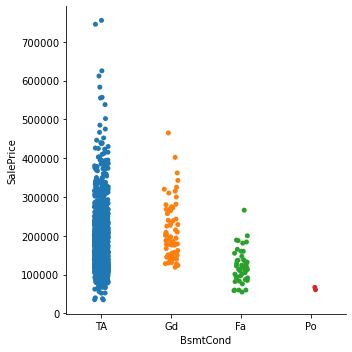

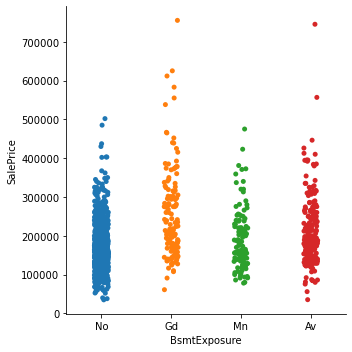

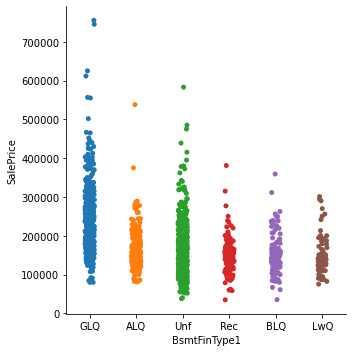

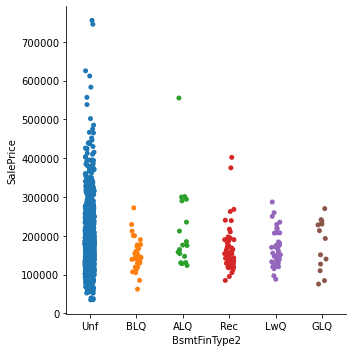

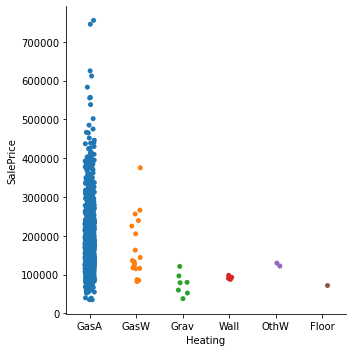

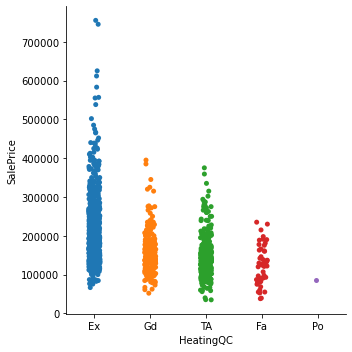

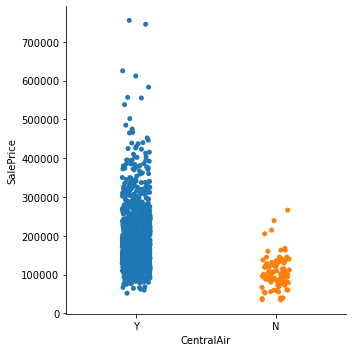

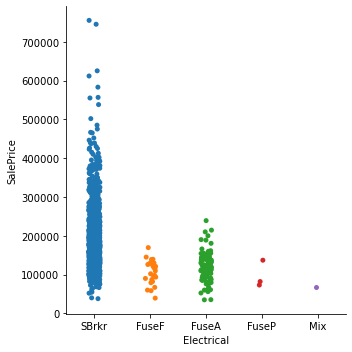

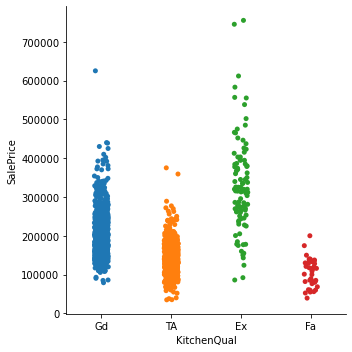

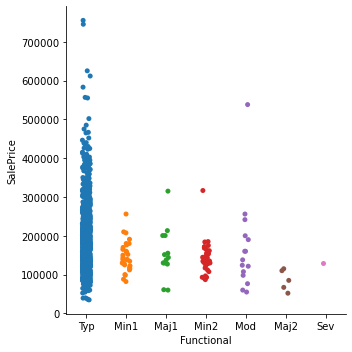

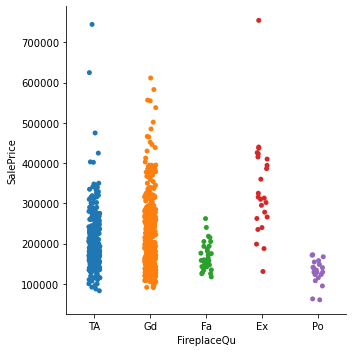

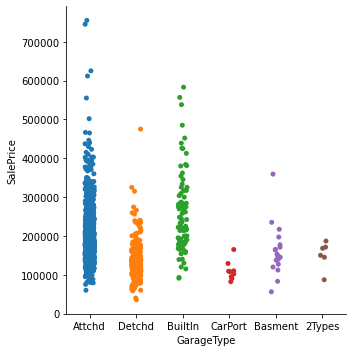

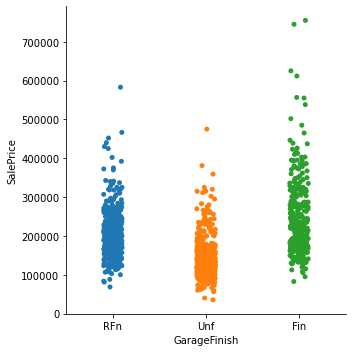

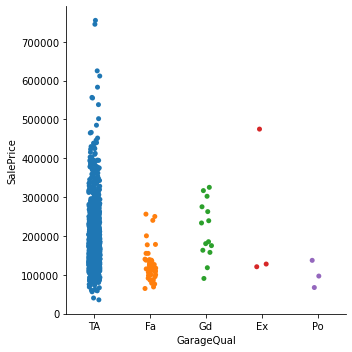

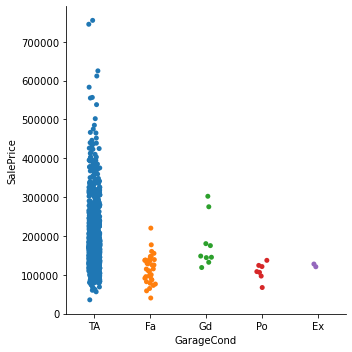

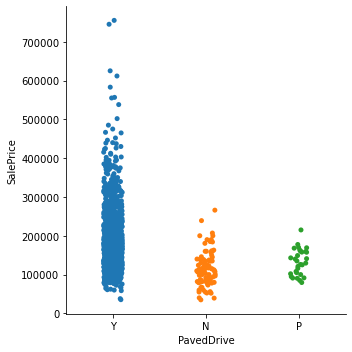

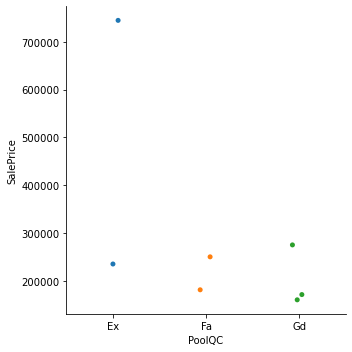

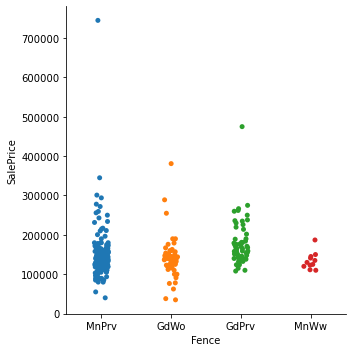

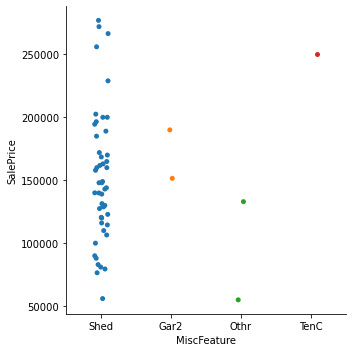

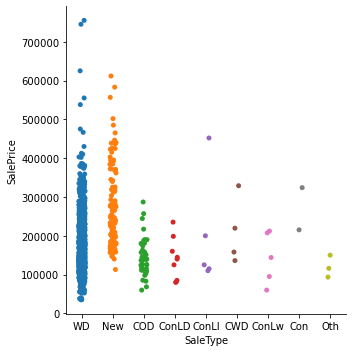

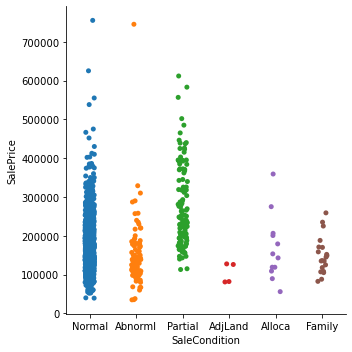

In [71]:
for f in cat:
    sns.catplot(x=f, y="SalePrice", data=df)
    plt.xlabel(f)
    plt.show()

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(['SalePrice'], axis=1),df['SalePrice'],test_size=0.1,random_state=0)

**Feature Engineering**

In [73]:
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
930,931,20,RL,73.0,8925,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
656,657,20,RL,72.0,10007,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,8,2008,WD,Normal
45,46,120,RL,61.0,7658,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
1348,1349,20,RL,NaN,16196,Pave,NaN,IR3,Low,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
55,56,20,RL,100.0,10175,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,764,60,RL,82.0,9430,Pave,NaN,Reg,Lvl,AllPub,...,180,0,NaN,NaN,NaN,0,7,2009,WD,Normal
835,836,20,RL,60.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
1216,1217,90,RM,68.0,8930,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
559,560,120,RL,NaN,3196,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


In [74]:
y_train

930     201000
656     145500
45      319900
1348    215000
55      180500
         ...  
763     337000
835     128000
1216    112000
559     234000
684     221000
Name: SalePrice, Length: 1314, dtype: int64

In [76]:
c = []
for f in X_train.columns:
    if X_train[f].dtypes=='O':
        c.append(f)
print('num_type',len(c))

n = []       
for f in X_train.columns:
    if X_train[f].dtypes!='O':
        n.append(f)
print('object type',len(n))

In [78]:
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
930,931,20,RL,73.0,8925,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
656,657,20,RL,72.0,10007,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,8,2008,WD,Normal
45,46,120,RL,61.0,7658,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
1348,1349,20,RL,NaN,16196,Pave,NaN,IR3,Low,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
55,56,20,RL,100.0,10175,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,764,60,RL,82.0,9430,Pave,NaN,Reg,Lvl,AllPub,...,180,0,NaN,NaN,NaN,0,7,2009,WD,Normal
835,836,20,RL,60.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
1216,1217,90,RM,68.0,8930,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
559,560,120,RL,NaN,3196,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


In [79]:
# The ocurrence of unique values
print('\n \n** In train data ** \n \n')
for feature in X_train.columns:
    if X_train[feature].dtype=='O':
        print(feature,"  : ",len(X_train[feature].unique()))

print('\n \n \n \n ** In test data ** \n \n')
for feature in X_test.columns:
    if X_test[feature].dtype=='O':
        print(feature,"  : ",len(X_test[feature].unique()))
        

In [80]:
# Imputing the null values with some data
for feature in X_train.columns:
    if X_train[feature].isnull().sum()>1:
        if X_train[feature].dtype=='O':
            X_train[feature]=X_train[feature].fillna('NULL')
        
for feature in X_test.columns:
    if X_test[feature].isnull().sum()>1:
        if X_test[feature].dtype=='O':
            X_test[feature]=X_test[feature].fillna('NULL')

In [81]:
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
930,931,20,RL,73.0,8925,Pave,NULL,IR1,HLS,AllPub,...,0,0,NULL,NULL,NULL,0,7,2009,WD,Normal
656,657,20,RL,72.0,10007,Pave,NULL,IR1,Lvl,AllPub,...,0,0,NULL,MnPrv,NULL,0,8,2008,WD,Normal
45,46,120,RL,61.0,7658,Pave,NULL,Reg,Lvl,AllPub,...,0,0,NULL,NULL,NULL,0,2,2010,WD,Normal
1348,1349,20,RL,NaN,16196,Pave,NULL,IR3,Low,AllPub,...,0,0,NULL,NULL,NULL,0,8,2007,WD,Normal
55,56,20,RL,100.0,10175,Pave,NULL,IR1,Lvl,AllPub,...,0,0,NULL,NULL,NULL,0,7,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,764,60,RL,82.0,9430,Pave,NULL,Reg,Lvl,AllPub,...,180,0,NULL,NULL,NULL,0,7,2009,WD,Normal
835,836,20,RL,60.0,9600,Pave,NULL,Reg,Lvl,AllPub,...,0,0,NULL,NULL,NULL,0,2,2010,WD,Normal
1216,1217,90,RM,68.0,8930,Pave,NULL,Reg,Lvl,AllPub,...,0,0,NULL,NULL,NULL,0,4,2010,WD,Normal
559,560,120,RL,NaN,3196,Pave,NULL,Reg,Lvl,AllPub,...,0,0,NULL,NULL,NULL,0,10,2006,WD,Normal


In [82]:
# imputing null values in case of numbers
for feature in X_train:
    if X_train[feature].isnull().sum()>1:
        if X_train[feature].dtypes!='O':
            X_train[feature+'nan']=np.where(X_train[feature].isnull(),1,0)
            X_train[feature].fillna(X_train[feature].median(),inplace=True)

for feature in X_test:
    if X_test[feature].isnull().sum()>1:
        if X_test[feature].dtypes!='O':
            X_test[feature+'nan']=np.where(X_test[feature].isnull(),1,0)
            X_test[feature].fillna(X_test[feature].median(),inplace=True)


In [83]:
# Bringing the data into gaussian format
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

for feature in num_features:
    X_train[feature]=np.log(X_train[feature])
    X_test[feature]=np.log(X_test[feature])

In [84]:
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
930,931,20,RL,4.290459,9.096612,Pave,NULL,IR1,HLS,AllPub,...,NULL,NULL,0,7,2009,WD,Normal,0,0,0
656,657,20,RL,4.276666,9.211040,Pave,NULL,IR1,Lvl,AllPub,...,MnPrv,NULL,0,8,2008,WD,Normal,0,0,0
45,46,120,RL,4.110874,8.943506,Pave,NULL,Reg,Lvl,AllPub,...,NULL,NULL,0,2,2010,WD,Normal,0,0,0
1348,1349,20,RL,4.234107,9.692520,Pave,NULL,IR3,Low,AllPub,...,NULL,NULL,0,8,2007,WD,Normal,1,0,0
55,56,20,RL,4.605170,9.227689,Pave,NULL,IR1,Lvl,AllPub,...,NULL,NULL,0,7,2008,WD,Normal,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,764,60,RL,4.406719,9.151651,Pave,NULL,Reg,Lvl,AllPub,...,NULL,NULL,0,7,2009,WD,Normal,0,0,0
835,836,20,RL,4.094345,9.169518,Pave,NULL,Reg,Lvl,AllPub,...,NULL,NULL,0,2,2010,WD,Normal,0,0,0
1216,1217,90,RM,4.219508,9.097172,Pave,NULL,Reg,Lvl,AllPub,...,NULL,NULL,0,4,2010,WD,Normal,0,0,0
559,560,120,RL,4.234107,8.069655,Pave,NULL,Reg,Lvl,AllPub,...,NULL,NULL,0,10,2006,WD,Normal,1,0,0


In [85]:
# encoding the categorical features
from sklearn.preprocessing import LabelEncoder 

for c in X_train.columns:
    le = LabelEncoder() 
    if X_train[c].dtype=='O':
        X_train[c]= le.fit_transform(list(X_train[c].values))

for c in X_test.columns:
    le = LabelEncoder() 
    if X_test[c].dtype=='O':
        X_test[c]= le.fit_transform(list(X_test[c].values))

In [86]:
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
930,931,20,3,4.290459,9.096612,1,1,0,1,0,...,4,1,0,7,2009,8,4,0,0,0
656,657,20,3,4.276666,9.211040,1,1,0,3,0,...,2,1,0,8,2008,8,4,0,0,0
45,46,120,3,4.110874,8.943506,1,1,3,3,0,...,4,1,0,2,2010,8,4,0,0,0
1348,1349,20,3,4.234107,9.692520,1,1,2,2,0,...,4,1,0,8,2007,8,4,1,0,0
55,56,20,3,4.605170,9.227689,1,1,0,3,0,...,4,1,0,7,2008,8,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,764,60,3,4.406719,9.151651,1,1,3,3,0,...,4,1,0,7,2009,8,4,0,0,0
835,836,20,3,4.094345,9.169518,1,1,3,3,0,...,4,1,0,2,2010,8,4,0,0,0
1216,1217,90,4,4.219508,9.097172,1,1,3,3,0,...,4,1,0,4,2010,8,4,0,0,0
559,560,120,3,4.234107,8.069655,1,1,3,3,0,...,4,1,0,10,2006,8,4,1,0,0


In [87]:
# Feature Scaling 

feature_scale_train=[feature for feature in X_train.columns if feature not in ['Id']]
feature_scale_test=[feature for feature in X_test.columns if feature not in ['Id']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler()

s_train_X = transformer.fit_transform(X_train[feature_scale_train])
s_test_X = transformer.fit_transform(X_test[feature_scale_test])

In [88]:
X_train = pd.concat([X_train[['Id']].reset_index(drop=True),
                    pd.DataFrame(s_train_X, columns=feature_scale_train)],
                    axis=1)

X_test = pd.concat([X_test[['Id']].reset_index(drop=True),
                    pd.DataFrame(s_test_X, columns=feature_scale_test)],
                    axis=1)

In [89]:
# y data to gaussian
y_train=np.log(y_train)
y_test=np.log(y_test)

**Modelling, Prediction and evaluation**

In [90]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import sklearn.metrics as metrics
import math

In [91]:
# defining model with parameters (Xgboost and light GbM)

xgb =XGBRegressor( booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=1.5, n_estimators=2400,
             n_jobs=1, nthread=None, objective='reg:linear',
             reg_alpha=0.6, reg_lambda=0.6, scale_pos_weight=1, 
             silent=None, subsample=0.8, verbosity=1)


lgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=12000, 
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.4, 
                                       )

In [92]:
#Fitting
xgb.fit(X_train, y_train)
lgbm.fit(X_train, y_train)

[05:34:42] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[05:34:52] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


LGBMRegressor(bagging_fraction=0.75, bagging_freq=5, bagging_seed=7,
              feature_fraction=0.4, learning_rate=0.01, max_bin=200,
              n_estimators=12000, num_leaves=4, objective='regression')

In [93]:
# Predictions
predict1 = xgb.predict(X_test)
predict = lgbm.predict(X_test)

In [96]:
# evaluation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(xgb, X_train, y_train, scoring='neg_mean_squared_error', cv=folds)
print(' root mean squared error:',np.sqrt(-scores))


folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lgbm, X_train, y_train, scoring='neg_mean_squared_error', cv=folds)
print(' root mean squared error:',np.sqrt(-scores))

[05:38:16] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[05:38:23] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[05:38:23] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[05:38:31] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[05:38:31] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[05:38:38] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[05:38:38] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[05:38:46] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[05:38:46] WARNING: ../src/objective/regression_

In [97]:
# Feature selection with lasso
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [98]:

model.get_support()


array([False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True, False, False, False, False, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True, False,  True,  True, False,
       False,  True,  True, False, False, False, False, False,  True,
       False,  True,  True,  True, False, False, False,  True, False,
       False,  True,  True,  True, False,  True,  True,  True,  True,
       False, False, False, False, False,  True, False,  True, False,
       False, False])

In [100]:
selected_feat = X_train.columns[(model.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))


total features: 83
selected features: 36


In [101]:
print('Selected features:>> ',[selected_feat])

Selected features:>>  [Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'TotalBsmtSF', 'HeatingQC', 'Electrical',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageCars', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'YrSold', 'SaleCondition'],
      dtype='object')]
